# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
# View Json data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_url = url + "&q=" + city

weather_response = requests.get(city_url).json()
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f0bc229ff6160bc4863df4c196168f8&q=belushya guba


In [4]:
# Opening url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print(f"Beginning Data Retrieval")
print(f"----------------------------")

# Create counters
record_count = 1
set_count = 1

# loop through all cities in the list
for i, city in enumerate(cities):
    
    # Group cites into sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create an endpoint url for each city    
    city_url = url + "&q=" + city 
    
    # Print the log
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add one to the record count
    record_count += 1
    
    # Run an API request for each city
    try:
        city_weather = requests.get(city_url).json()
        
        # Max temp, humidity, cloudieness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloud = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city_data list with the information in city_weather
        city_data.append({"City": city, "Lat": city_lat, "Lng": city_lng,
                         "Max Temp": city_max_temp, "Humidity": city_humidity,
                         "Cloudiness": city_cloud, "Wind Speed": city_wind,
                         "Country": city_country, "Date": city_date})
        
    # Account for responses without cities
    except:
        print("City not found. Skipping - - -")
        pass
    
# Indicate when data has finished loading
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | haines junction
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | sumkino
Processing Record 4 of Set 1 | awjilah
Processing Record 5 of Set 1 | kautokeino
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | escarcega
Processing Record 11 of Set 1 | srednekolymsk
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | hemsedal
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | temir
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | indiaroba
Processing Record 23 of Set 1 | sikonge
Processing Re

Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | lolua
City not found. Skipping - - -
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping - - -
Processing Record 40 of Set 4 | fergus falls
Processing Record 41 of Set 4 | quelimane
Processing Record 42 of Set 4 | kyshtovka
Processing Record 43 of Set 4 | vanino
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | zatoka
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | lokachi
Processing Record 49 of Set 4 | bairiki
City not found. Skipping - - -
Processing Record 0 of Set 5 | palu
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | sao tome
City not found. Skipping - - -
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | djibo
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | marsa matruh
Processing Record 7 of Set 5 | teguldet
Processing Record 8 

Processing Record 23 of Set 8 | muisne
Processing Record 24 of Set 8 | emerald
Processing Record 25 of Set 8 | bac lieu
City not found. Skipping - - -
Processing Record 26 of Set 8 | great falls
Processing Record 27 of Set 8 | santa isabel do rio negro
Processing Record 28 of Set 8 | tooele
Processing Record 29 of Set 8 | san fernando
Processing Record 30 of Set 8 | comodoro rivadavia
Processing Record 31 of Set 8 | lensk
Processing Record 32 of Set 8 | satitoa
City not found. Skipping - - -
Processing Record 33 of Set 8 | ilulissat
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | axim
Processing Record 37 of Set 8 | birao
Processing Record 38 of Set 8 | snasa
Processing Record 39 of Set 8 | camacari
Processing Record 40 of Set 8 | tabiauea
City not found. Skipping - - -
Processing Record 41 of Set 8 | madison
Processing Record 42 of Set 8 | boyuibe
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8

Processing Record 8 of Set 12 | haikou
Processing Record 9 of Set 12 | shirokovskiy
Processing Record 10 of Set 12 | sergeyevka
Processing Record 11 of Set 12 | angoram
Processing Record 12 of Set 12 | sirnak
Processing Record 13 of Set 12 | taman
Processing Record 14 of Set 12 | olafsvik
City not found. Skipping - - -
Processing Record 15 of Set 12 | neiafu
Processing Record 16 of Set 12 | xichang
Processing Record 17 of Set 12 | rabo de peixe
Processing Record 18 of Set 12 | jalu
Processing Record 19 of Set 12 | jieshi
Processing Record 20 of Set 12 | alotau
City not found. Skipping - - -
Processing Record 21 of Set 12 | baoma
Processing Record 22 of Set 12 | aswan
Processing Record 23 of Set 12 | vestmannaeyjar
Processing Record 24 of Set 12 | pishva
Processing Record 25 of Set 12 | celestun
Processing Record 26 of Set 12 | karamea
City not found. Skipping - - -
Processing Record 27 of Set 12 | dekoa
City not found. Skipping - - -
Processing Record 28 of Set 12 | yurimaguas
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a new data frame from city_data
city_data_pd = pd.DataFrame(city_data)

# Set values for graphing
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export to csv and set index
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Final counts
city_data_pd.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [6]:
# Display the city data frame
city_data_pd.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,haines junction,24,CA,1554236056,42,60.75,-137.51,41.05,2.73
1,hermanus,0,ZA,1554235341,76,-34.42,19.24,64.99,10.00
2,sumkino,24,RU,1554236057,77,58.11,68.32,20.62,2.73
3,awjilah,0,LY,1554236057,38,29.14,21.30,67.15,13.02
4,kautokeino,88,NO,1554236057,92,69.01,23.04,30.70,4.74
5,vaini,0,IN,1554236027,92,15.34,74.49,66.43,2.51
6,hobart,0,AU,1554235935,59,-42.88,147.33,61.00,10.29
7,mataura,0,NZ,1554235805,93,-46.19,168.86,44.01,1.01
8,new norfolk,0,AU,1554236056,59,-42.78,147.06,61.00,10.29
9,escarcega,12,MX,1554236058,71,18.61,-90.75,84.25,2.95


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

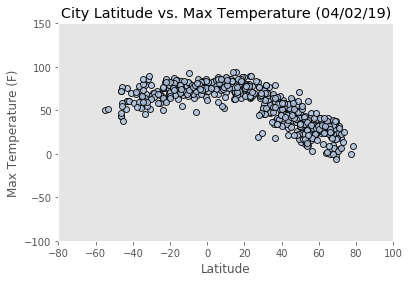

In [11]:
plt.style.use('ggplot')

# Build the satter plot for Latitude and Max Temp
plt.scatter(lats, max_temps, color="lightsteelblue", edgecolor="black", marker="o", alpha=0.85, linewidths=1, label="Cities")

# Label the graph and axies 
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the graph size
plt.ylim(-100, 150)
plt.xlim(-80, 100)

plt.grid()
plt.show

# Save the graph image
plt.savefig("output_data/Fig1.png")

#### Latitude vs. Humidity Plot

In [ ]:
# Build the satter plot for Latitude and Humidity
plt.scatter(lats, humidity, color="tomato", edgecolor="wheat", marker="o", alpha=0.8, linewidths=1, label="Cities")

# Label the graph and axies
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Set the graph size
plt.ylim(-20, 120)
plt.xlim(-80, 100)

plt.grid()
plt.show

# Save the graph image
plt.savefig("output_data/Fig2.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
# Build the satter plot for Latitude and Cloudiness
plt.scatter(lats, cloudiness, color="slategray", edgecolor="black", marker="o", alpha=0.85, linewidths=1, label="Cities")

# Label the graph and axies
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Set the graph size
plt.ylim(-20, 120)
plt.xlim(-80, 100)

plt.grid()
plt.show

# Save the graph image
plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the satter plot for Latitude and Wind Speed
plt.scatter(lats, wind_speed, color="palevioletred", edgecolor="black", marker="o", alpha=0.8, linewidths=1, label="Cities")

# Label the graph and axies
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the graph size
plt.ylim(-5, max(wind_speed)+10)
plt.xlim(-80, 100)

plt.grid()
plt.show

# Save the graph image
plt.savefig("output_data/Fig4.png")